<a href="https://colab.research.google.com/github/Manpriya17/Data-Science-TSF/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Submitted by:** Manpriya Batra

**TASK 1 - PREDICTION USING SUPERVISED ML**



*   Predicted the percentage of an student based on the no. of study hours.
*   This is a simple linear regression task as it involves just 2 variables.
*   What will be predicted score if a student studies for 9.25 hrs/ day?
*   Data can be found at http://bit.ly/w-data
*   Used scikit-learn to implement simple Linear Regression







**Importing Needed packages**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn import linear_model

**Reading and Understanding the data**

In [2]:
df = pd.read_csv("http://bit.ly/w-data")

# take a look at the dataset
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


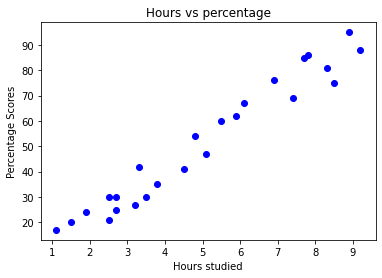

In [6]:
plt.scatter(df.Hours, df.Scores ,  color='blue')
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.title("Hours vs Score")
plt.show()

The graph shows a   ** positive Linear Relationship**  between our independent variable that is Hours and our target variable that is Scores.

**Splitting into Test and Train sets**

In [7]:
X = df.iloc[:, :-1].values   #Input data
y = df.iloc[:, 1].values     #Output data


#Test-Train Split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)
#The Test:Train ratio is 80:20


**Training our data using Linear Regression**

In [8]:
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)

# The coefficients
print ('Coefficient: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [9.91065648]
Intercept:  2.018160041434662


***Plotting the Regression Line *** 

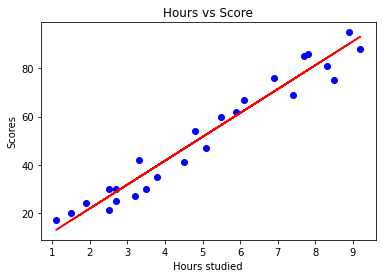

In [10]:
plt.scatter(df.Hours, df.Scores ,  color='blue')
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.title("Hours vs Score")


plt.plot(df.Hours, regr.coef_*df.Hours + regr.intercept_, '-r')
plt.show()

**Making Predictions**

In [11]:
print(X_test) # Testing data - In Hours
y_pred = regr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
#Let's Compare our results
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
#Prediction of Score of 9.25 hours of study
hours1 = [[9.25]]
own_pred = regr.predict(hours1)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Evaluation Metrics**

Mean Absolute Error: It is the mean of the absolute value of the errors. This
is the easiest of the metrics to understand since it’s just average error.

Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print("Mean Squared Error:-",metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error:- 21.598769307217456
